# PCA

- PCA란
    - 데이터 집합 내에 존재하는 각 데이터의 차이를 가장 잘 나타내 주는 요소를 찾아 내는 방법
    - 통계 데이터 분석(주성분 찾기), 데이터 압축(차원감소), 노이즈 제거 등 다양한 분야엥서 사용
    - 차원축소(dimensionality reduction)와 변수추출(feature extraction) 기법으로널리 쓰이고 있는 주성분분석(Principal Component Analysis)
    - PCA는 데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아,고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법
    - 변수추출(Feature Extraction)은 기존 변수를 조합해 새로운 변수를 만드는 기법(변수선택(Feature Selection)과 구분할 것)
    
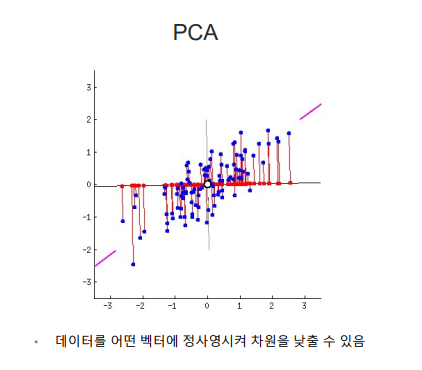


In [1]:
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

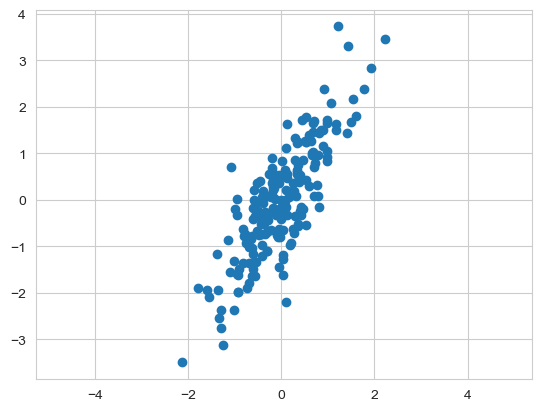

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.axis('equal'); #축을 같은 간격으로

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=13) #n_components: 주성분 개수
pca.fit(X)

PCA(n_components=2, random_state=13)

In [7]:
pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [9]:
pca.explained_variance_ #설명력

array([1.82531406, 0.13209947])

In [10]:
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [17]:
pca.mean_

array([-0.03360413, -0.03527382])

In [15]:
# 주성분 벡터 그리기
def dtaw_vector(v0, v1, ax= None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth = 2, color = 'black',
                      shrinkA = 0, shrinkB = 0)
    ax.annotate('',v1, v0, arrowprops=arrowprops)

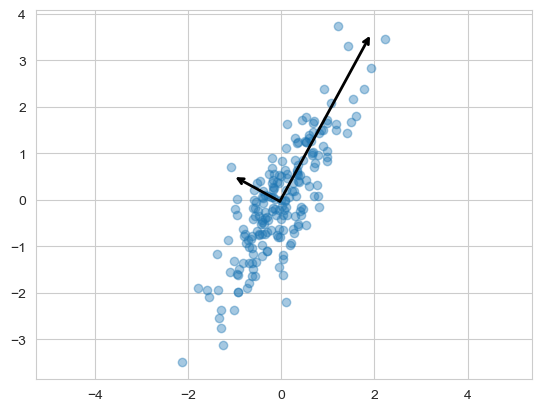

In [16]:
plt.scatter(X[:,0], X[:,1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    dtaw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.show()

- 데이터의 주성분을 찾은 다음 주축을 변경하는 것도 가능

In [18]:
pca = PCA(n_components=1, random_state=13) #n_components: 주성분 개수
pca.fit(X)

PCA(n_components=1, random_state=13)

In [19]:
pca.components_

array([[0.47802511, 0.87834617]])

In [20]:
pca.mean_

array([-0.03360413, -0.03527382])

In [21]:
pca.explained_variance_ratio_

array([0.93251326])

In [24]:
X_pca = pca.transform(X)
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

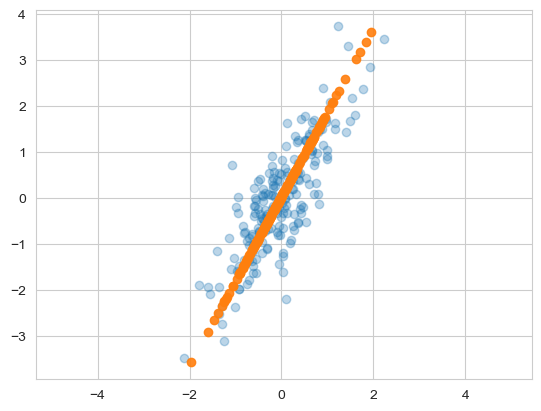

In [25]:
X_new = pca.inverse_transform(X_pca) #2차원으로 바꿔줌
plt.scatter(X[:,0],X[:,1], alpha=0.3)
plt.scatter(X_new[:,0], X_new[:,1], alpha= 0.9)
plt.axis('equal')
plt.show()

### 실습 - Iris data

In [26]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [27]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [28]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components= n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [29]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [30]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [31]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [32]:
# pca결과를 pandas로 정리
def get_pd_from_pca(pca_data, cols=['pca_component_1','pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [33]:
#간단히 4개의 특성을 두개의 특성으로 정리
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


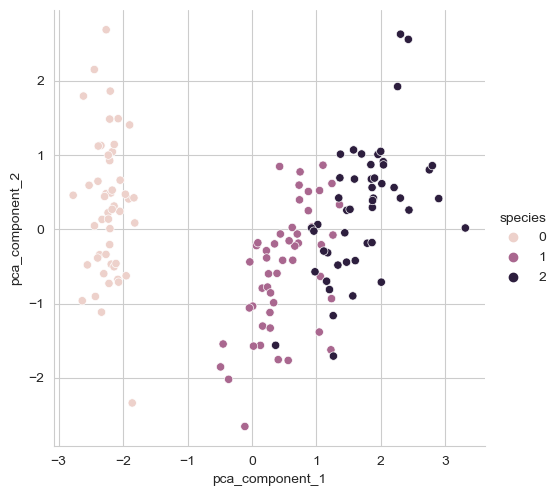

In [35]:
sns.pairplot(iris_pd_pca, hue='species', height=5, 
             x_vars=['pca_component_1'], y_vars=['pca_component_2']);

In [36]:
# 4개의 특성을 모두 사용해서 randomforest적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv = 5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv = cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score :  0.96


In [37]:
# 두개의 특성만 적용했을 때

pca_X = iris_pd_pca[['pca_component_1','pca_component_2']]

rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


# 실습 - wine data

In [38]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [39]:
# 와인 생상 분류
wine_y = wine['color']
wine_X = wine.drop(['color'], axis=1)
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [41]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [44]:
def print_variance_ratio(pca):
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of varience_ratio : ', np.sum(pca.explained_variance_ratio_))

In [45]:
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117]
sum of varience_ratio :  0.4742834274323615


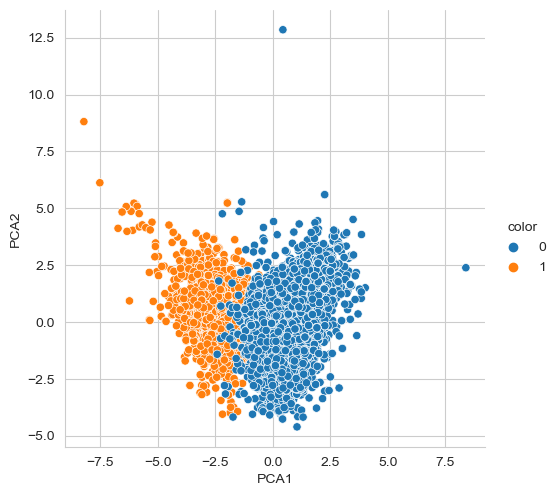

In [43]:
pca_colums = ['PCA1','PCA2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_colums)
pca_wine_pd["color"] = wine_y.values

sns.pairplot(pca_wine_pd, hue='color', height=5,
             x_vars=['PCA1'], y_vars=['PCA2'])

In [46]:
rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


In [47]:
pca_X = pca_wine_pd[['PCA1', 'PCA2']]
rf_scores(pca_X, wine_y)

Score :  0.981067803635933


In [48]:
# 주성분 3개로 분석

pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117 0.13679223]
sum of varience_ratio :  0.6110756621838707


In [49]:
pca_colums = ['PCA1','PCA2','PCA3']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_colums)
pca_wine_pd["color"] = wine_y.values


In [50]:
pca_X = pca_wine_pd[pca_colums]
rf_scores(pca_X, wine_y)

Score :  0.9832236631728548


In [51]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values

In [52]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x = 'PCA1',y = 'PCA2',z = 'PCA3', color='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r= 0, b= 0, t = 0) )
fig.show()

# PCA eigenface

In [53]:
# olivetti 데이터(AT&T와 캠프리지 대학의 공동 연구 데이터)

from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\qnwje\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal positio

In [54]:
# 특정 샘플만 선택
K = 20
faces = faces_all.images[faces_all.target == K]

In [55]:
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

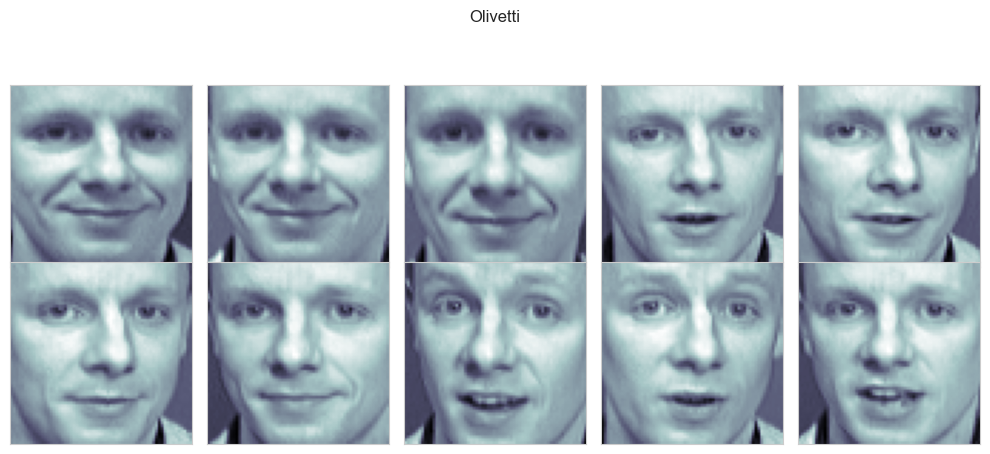

In [56]:
import matplotlib.pyplot as plt

N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('Olivetti')
plt.tight_layout()
plt.show()

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X= faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

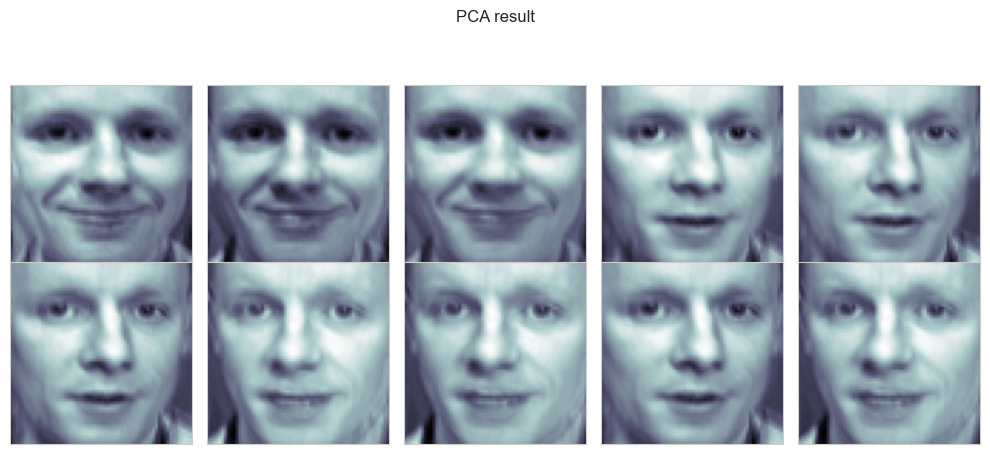

In [58]:
N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64, 64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('PCA result')
plt.tight_layout()
plt.show()

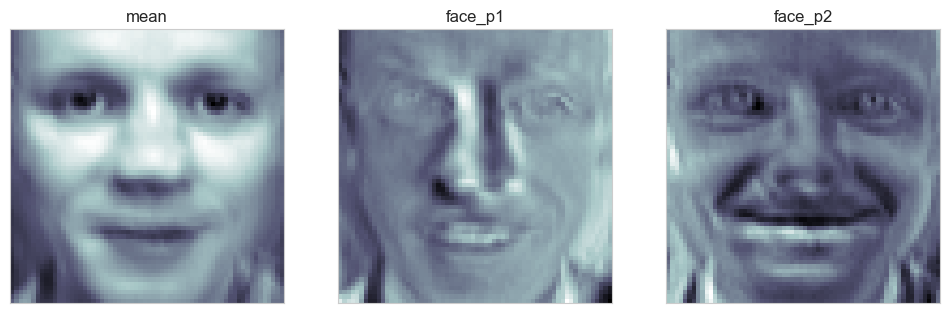

In [59]:
# 원점과 두개의 eigen face

face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.figure(figsize=(12, 7))
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]);  plt.yticks([]); plt.title('mean')

plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]);  plt.yticks([]); plt.title('face_p1')

plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]);  plt.yticks([]); plt.title('face_p2')

plt.show()

# 10장의 사진은 이 세장으로 표현할 수 있다

In [60]:
# 가중치 선정
N = 2
M = 5

w = np.linspace(-5, 10, N*M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

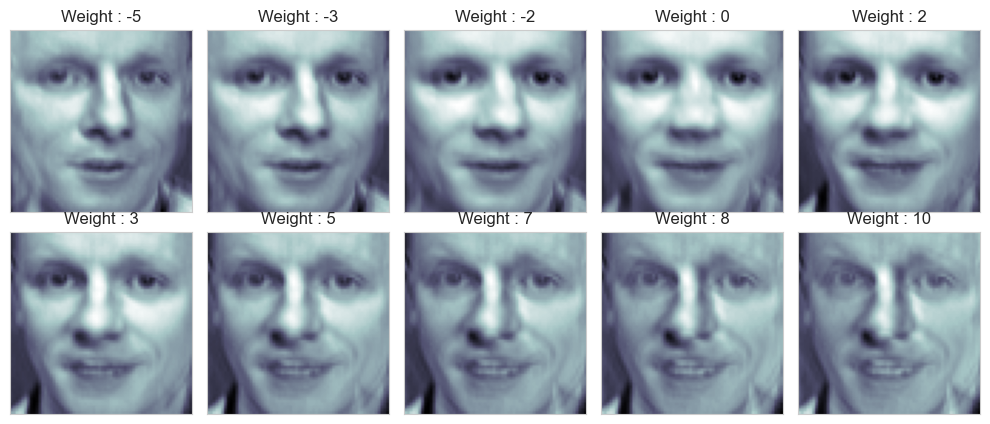

In [62]:
# 첫번째 성분의 변화
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n]*face_p1, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

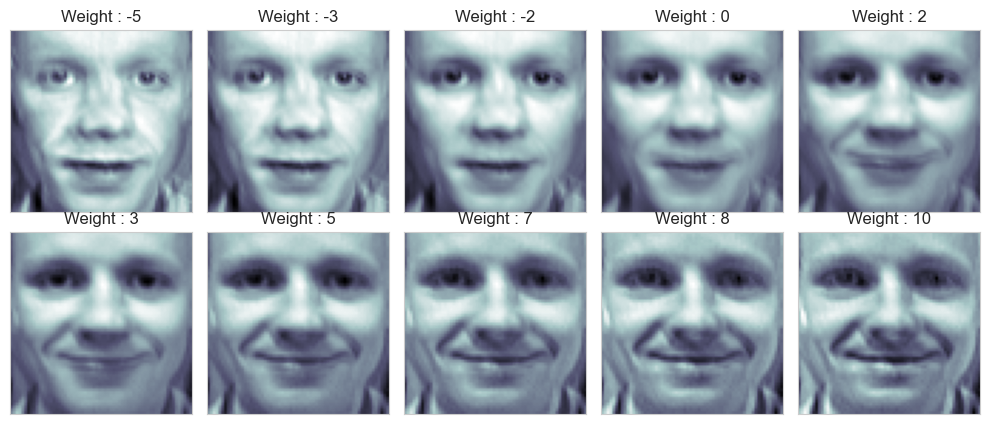

In [63]:
# 두번째 성분의 변화
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

In [64]:
# 두개의 성분을 다 표현해 보기

nx , ny = (5, 5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)

w1 , w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [65]:
w1 = w1.reshape(-1, )
w2 = w2.reshape(-1, )
w2.shape

(25,)

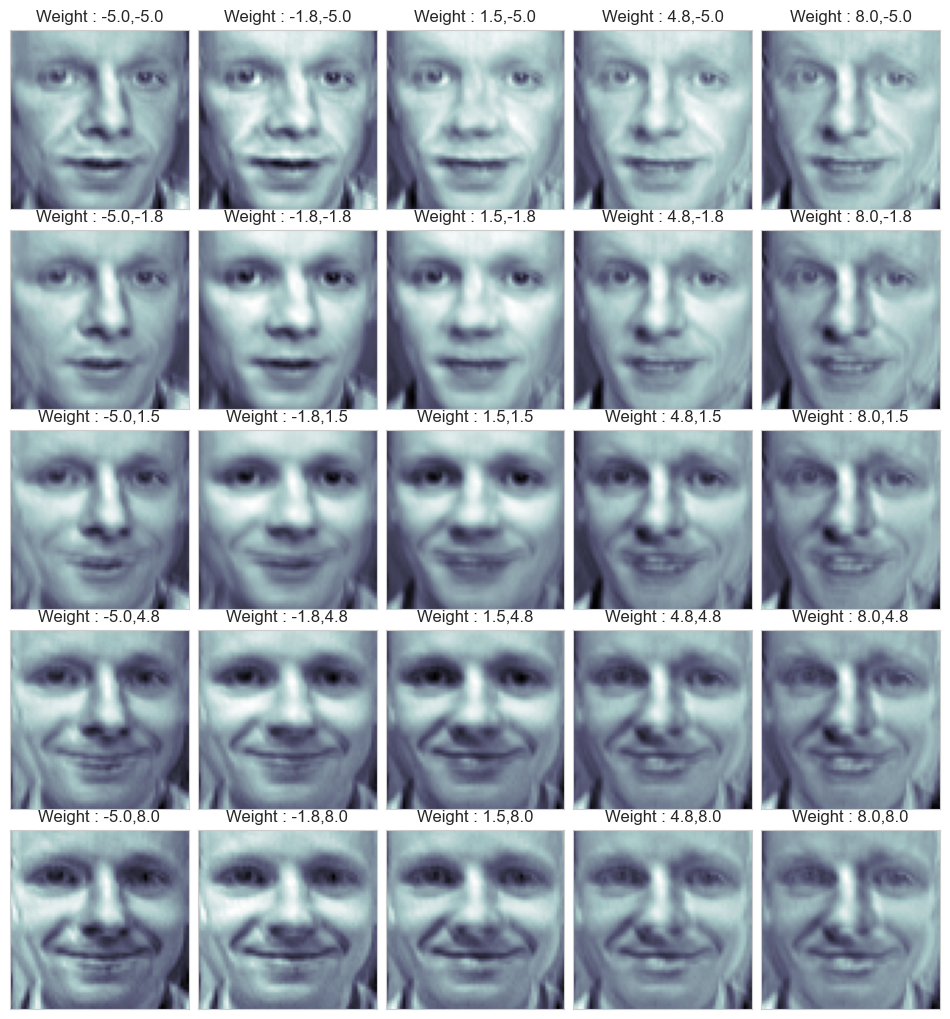

In [67]:
# 합성
fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)

N = 5
M = 5 

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n]*face_p1 + w2[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('Weight : ' + str(round(w1[n],1))+ ',' + str(round(w2[n],1)))

plt.show()